# Golden Cross with Blankly

This tutorial goes over how to implement a golden cross using Blankly in a Jupyter Notebook. 

Blankly is like any other package in that it allows users to easily interact with its various functions, explore the data, do processing, and only when they're ready, to fully create a useful `Strategy`. Today we're going to investigate the golden cross strategy using Simple Moving Averages of 50 and 100 


## Environment Setup

### `blankly init` 

To easily initialize our codebase and the necessary files, let's simply run `blankly init` in the command line

In [1]:
!blankly init

Initializing...

██████╗ ██╗      █████╗ ███╗   ██╗██╗  ██╗██╗  ██╗   ██╗    ███████╗██╗███╗   ██╗ █████╗ ███╗   ██╗ ██████╗███████╗
██╔══██╗██║     ██╔══██╗████╗  ██║██║ ██╔╝██║  ╚██╗ ██╔╝    ██╔════╝██║████╗  ██║██╔══██╗████╗  ██║██╔════╝██╔════╝
██████╔╝██║     ███████║██╔██╗ ██║█████╔╝ ██║   ╚████╔╝     █████╗  ██║██╔██╗ ██║███████║██╔██╗ ██║██║     █████╗  
██╔══██╗██║     ██╔══██║██║╚██╗██║██╔═██╗ ██║    ╚██╔╝      ██╔══╝  ██║██║╚██╗██║██╔══██║██║╚██╗██║██║     ██╔══╝  
██████╔╝███████╗██║  ██║██║ ╚████║██║  ██╗███████╗██║       ██║     ██║██║ ╚████║██║  ██║██║ ╚████║╚██████╗███████╗
╚═════╝ ╚══════╝╚═╝  ╚═╝╚═╝  ╚═══╝╚═╝  ╚═╝╚══════╝╚═╝       ╚═╝     ╚═╝╚═╝  ╚═══╝╚═╝  ╚═╝╚═╝  ╚═══╝ ╚═════╝╚══════╝

Already exists - skipping...
Already exists - skipping...
Already exists - skipping...
Already exists - skipping...
Writing deployment defaults...
Already exists - skipping...
Writing requirements.txt defaults...
Already exists - skipping...
Done!


As you can see, our directory now has everything that we need :D

In [2]:
!ls

Golden Cross with Blankly.ipynb keys.json
backtest.json                   price_caches
blankly.json                    requirements.txt
bot.py                          settings.json


### `keys.json`

Make sure that you have in the same directory as your jupyter notebook, the necessary `keys.json` that houses all of your API keys that you are going to use. To check out how to get keys setup, look [here](https://docs.blankly.finance/config/keys.json), we will be using Alpaca in this tutorial so make sure you have your Alpaca keys

## Imports

The imports are pretty straight forward. Blankly allows you to easily import everything you need almost directly nad houses a variety of [built-in indicators](https://docs.blankly.finance/metrics/indicators) that you can directly use. 

*Note the `bokeh.io` import for `output_notebook`, this is important to allow the graphs to display (such as backtest results)*

In [3]:
from blankly import Strategy, StrategyState, Alpaca
from blankly.indicators import sma
from bokeh.io import output_notebook # this is to ensure that any plots are displayed in jupyter notebook
output_notebook()

Loading BokehJS ...

## Grabbing Some Data

Let's take a look at the power of Blankly by initializing an interface and then grabbing some price data

In [4]:
a = Alpaca() # this initializes an alpaca exchange

INFO: No portfolio name to load specified, defaulting to the first in the file: (alpaca test portfolio). This is fine if there is only one portfolio in use.
INFO: "use_yfinance" not specified in preferences, defaulting to: "False"


### Easily Get the Last X Bars

In [5]:
# this gets the last 5 OHLC points for NVDA
a.interface.history('NVDA', 5, resolution='1d') 

,time,open,high,low,close,volume
0,1640754000,302.94,305.48,293.6600,299.97,32036645.0
1,1640840400,298.28,304.57,295.4000,295.88,29281826.0
2,1640926800,296.75,300.30,293.3057,294.21,24464247.0
3,1641186000,298.24,307.11,297.8500,301.25,35656625.0
4,1641272400,302.61,304.68,283.4900,292.99,49212953.0


### Or Get Between Two Dates

In [6]:
 # get NVDA data between January 1st and February 4th of 2020
a.interface.history('NVDA', start_date='2020-01-01', end_date='2020-02-04')

,high,low,volume,close,open,time
0,239.9100,236.7200,5948415.0,239.91,238.85,1577941200
1,237.8300,234.1000,5145208.0,236.07,235.00,1578027600
2,237.2700,231.2700,6603313.0,237.06,232.36,1578286800
3,241.7700,236.3900,7980144.0,239.93,238.20,1578373200
4,242.0400,238.1490,6931017.0,240.38,239.76,1578459600
5,245.9297,240.8550,6386105.0,243.02,243.55,1578546000
6,248.5500,243.7500,7911735.0,244.32,247.48,1578632400
7,252.9884,246.7500,8008491.0,251.98,247.66,1578891600
8,251.2800,246.7500,8989483.0,247.28,250.51,1578978000
9,248.6891,244.5300,6578446.0,245.57,247.79,1579064400


## Using Indicators

Like we said earlier, let's take the data that we gathered and pass them through a moving average calculation. Here we'll get the past 500 daily OHLC points to calculate a 50-day SMA

In [7]:
nvda = a.interface.history('NVDA', 500, resolution='1d')

In [8]:
sma50 = sma(nvda['close'], 50)
sma50

0      254.130636
1      253.512436
2      253.615236
3      253.485236
4      253.684236
          ...    
446    290.055346
447    291.514146
448    292.976746
449    294.464546
450    295.779746
Length: 451, dtype: float64

<AxesSubplot:>

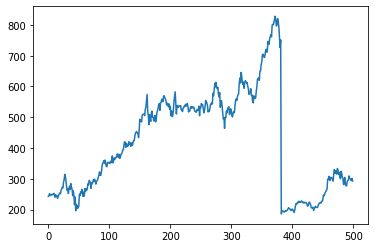

In [9]:
nvda['close'].plot()

<AxesSubplot:>

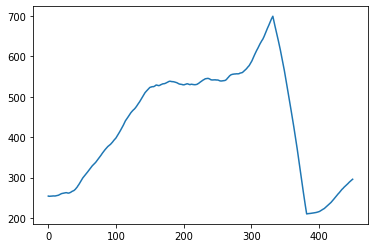

In [10]:
sma50.plot()

In [11]:
sma100 = sma(nvda['close'], 100)
sma100

0      275.201348
1      276.277648
2      277.341148
3      278.386548
4      279.436448
          ...    
396    251.740857
397    252.670157
398    253.618357
399    254.660957
400    255.600657
Length: 401, dtype: float64

<AxesSubplot:>

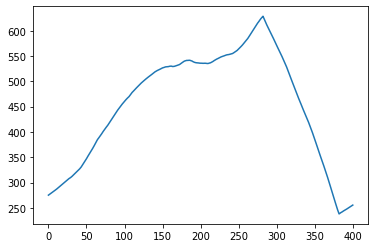

In [12]:
sma100.plot()

Nice! Now we have everything that we need to start making our golden cross and you can see that the results have smoothened out our price data

## The Strategy Framework

In [13]:
def init(symbol, state: StrategyState):
    # run on a new price event to initialize variables
    pass


def price_event(price, symbol, state: StrategyState):
    # we'll come back to this soon
    pass


s = Strategy(a) # we're passing in our alpaca exchange we defined earlier
s.add_price_event(price_event, 'NVDA', resolution='1d', init=init)

### `init` Function 

This is the function where we initialize our state variables and grab any data we need. In the case of a golden cross. We need to make sure we have enough data to actually calculate an SMA 

In [14]:
def init(symbol, state: StrategyState):
    interface: Interface = state.interface
    resolution: float = state.resolution
    variables = state.variables
    # initialize the historical data as a deque to save memory and effiency
    variables['history'] = interface.history(symbol, 800, resolution, return_as='deque')['close']
    variables['has_bought'] = False

Now this will run everytime our strategy starts to gather the data that we need so we're not doing expensive operations during our price event

## Creating Our Price Event

Every Blankly Bot has a price event structure where a price event is defined and then run at a specific time, let's take a look at this

In [15]:
def golden_cross(price, symbol, state: StrategyState):
    interface: Interface = state.interface
    variables = state.variables

    variables['history'].append(price)

    sma100 = sma(variables['history'], period=20)
    
    # match up dimensions so that we can use numpy for difference
    sma50 = sma(variables['history'], period=10)[-len(sma100):]
    diff = sma100 - sma50
    
    slope_sma50 = (sma50[-1] - sma50[-5]) / 5 # get the slope of the last 5 SMA50 Data Points
    prev_diff = diff[-2]
    curr_diff = diff[-1]
    
    is_cross_up = slope_sma50 > 0 and curr_diff >= 0 and prev_diff < 0
    is_cross_down = slope_sma50 < 0 and curr_diff <= 0 and prev_diff > 0
    
    # comparing prev diff with current diff will show a cross
    if is_cross_up and not variables['has_bought']:
        # determine how much we want to buy based on our cash allocation
        interface.market_order(symbol, 'buy', int(interface.cash / price))
        variables['has_bought'] = True
    elif is_cross_down and variables['has_bought']:
        # use strategy.base_asset if on CoinbasePro or Binance
        # truncate here to fix any floating point errors
        interface.market_order(symbol, 'sell', int(interface.account[symbol].available))
        variables['has_bought'] = False

Nice, now we have all the components that we can easily plug together to form a strategy

## Create Strategy

To create a strategy, we simply just add the price event

In [16]:
s = Strategy(a)
s.add_price_event(golden_cross, 'MSFT', resolution='1d', init=init)

## Run a Backtest

Now let's run the backtest for this strategy. We'll start out with $10,000 and backtest over 2 years of time 

In [17]:
results = s.backtest(initial_values={"USD": 10000}, to="2y")


Initializing...

Backtesting...
Progress: [##########] 99.21% 

In [18]:
results.metrics

{'Compound Annual Growth Rate (%)': 35.0,
 'Cumulative Returns (%)': 81.0,
 'Max Drawdown (%)': 13.0,
 'Variance (%)': 1.37,
 'Sortino Ratio': 1.27,
 'Sharpe Ratio': 1.2,
 'Calmar Ratio': 1.65,
 'Volatility': 0.01,
 'Value-at-Risk': 223.96,
 'Conditional Value-at-Risk': 5.94,
 'Risk Free Return Rate': 0.0,
 'Resampled Time': 86400.0}

Nice! We just made a model that successfully bought MSFT on a golden cross strategy on daily OHLC candles! 

If you liked this tutorial, check out more here at https://docs.blankly.finance or [join our Discord](https://discord.gg/xJAjGEAXNS)